# Dexian Data Analytics Technical Challenge

**Author:** James Meredith

Active Project Dates: Mar 15th, 2024 - Mar 22nd, 2024

***

![alt text](./images/company_logo.png)

## Abstract

This technical challenge aims to provide actionable insights from a dataset containing information on American colleges and universities. By applying advanced data analytics techniques, this project seeks to uncover trends and patterns that could assist a consulting firm in advising institutions of higher learning. Through meticulous data analysis, key insights regarding institutional types, acceptance rates, tuition fees, and graduation rates were discovered, enabling data-driven decision-making.

## Business Problem

The scenario for this technical challenge was as follows:

    You are working with a firm that provides consulting services for institutions of higher learning. The team has gathered some data about a number of schools, and they are hoping you can identify some meaningful insights that could help them as they advise various colleges and universities this year.

## The Data

The dataset for this challenge provides detailed information about various American colleges and universities, including public/private designation, application statistics, tuition fees, and graduation rates. The aim was to analyze this dataset to identify trends and insights that could inform strategic advice for higher education institutions.

The dataset used for this technical challenge can be found at the following: https://docs.google.com/spreadsheets/d/1rThcHm3ZATkhOtsGL6477nQaePrIzcsl/export

### Initial Exploration of The Dataset

Here we ingest the dataset using the Pandas library and perform an initial exploration of the dataset using Pandas, Matplotlib, and Seaborn:

In [111]:
# Ingest the dataset
import pandas as pd

filepath = './data/Universities.xlsx'
df = pd.read_excel(filepath,sheet_name='usnews3.data.9 .SS (v5.0)')

In [112]:
# Generate an overview of the data
df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

In [114]:
df.describe()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,1302.000000,1292.000000,1291.000000,1297.000000,1067.000000,1100.000000,1299.000000,1270.000000,1272.000000,1282.000000,981.000000,804.000000,1028.000000,1254.000000,1121.000000,1270.000000,1300.000000,1204.000000
mean,1.639017,2752.097523,1870.683191,778.880493,25.671978,52.350000,3692.665127,1081.526772,7897.274371,9276.905616,2514.681957,2060.983831,392.012646,549.972887,1389.291704,68.645669,14.858769,60.405316
std,0.480470,3541.974712,2250.866400,884.578274,18.312618,20.881316,4544.847897,1672.202912,5348.162626,4170.770851,1150.836848,661.742099,469.379234,167.355386,714.247857,17.825627,5.186399,18.889058
min,1.000000,35.000000,35.000000,18.000000,1.000000,6.000000,59.000000,1.000000,480.000000,1044.000000,500.000000,531.000000,9.000000,90.000000,75.000000,8.000000,2.300000,8.000000
25%,1.000000,695.750000,554.500000,236.000000,13.000000,36.750000,966.000000,131.250000,2580.000000,6111.000000,1710.000000,1619.250000,130.000000,480.000000,900.000000,57.000000,11.800000,47.000000
50%,2.000000,1470.000000,1095.000000,447.000000,21.000000,50.000000,1812.000000,472.000000,8050.000000,8670.000000,2200.000000,1980.000000,264.500000,502.000000,1250.000000,71.000000,14.300000,60.000000
75%,2.000000,3314.250000,2303.000000,984.000000,32.000000,66.000000,4539.500000,1313.000000,11600.000000,11659.000000,3040.000000,2401.500000,480.000000,600.000000,1794.000000,82.000000,17.600000,74.000000
max,2.000000,48094.000000,26330.000000,7425.000000,98.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,4374.000000,2340.000000,6900.000000,105.000000,91.800000,118.000000


We note here a few things:
- Dataset is 1302 rows (excluding headers) by 20 columns
- Dataset contains a mixture of data types (categorical and numeric), some of which are improperly formatted upon ingestion.
- Dataset contains null values
- Column Headers are a bit difficult to read

And from a cursory look at the summary statistics:
- Dataset contains illogical/anomalous values (ie. graduation rates and % of faculty with PhDs over 100%)

We'll address these issues in the cleaning section of this notebook next.

## Data Cleaning

Here we'll begin the process of cleaning the dataset.
Things to do:

- Change Column Names
- Remove or Correct Anomalies
- Handle Missing Values
- Correct Data Types
- Handle Outliers

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

### Changing Column Names
For clarity, Column Names have been changed for improved readability

In [101]:
# Renaming columns for improved readability
df.rename(columns={
    'College Name': 'college_name',
    'State': 'state',
    'Public (1)/ Private (2)': 'institution_type',
    '# appli. rec\'d': 'applications_received',
    '# appl. accepted': 'applications_accepted',
    '# new stud. enrolled': 'new_students_enrolled',
    '% new stud. from top 10%': 'percent_from_top_10',
    '% new stud. from top 25%': 'percent_from_top_25',
    '# FT undergrad': 'full_time_undergrads',
    '# PT undergrad': 'part_time_undergrads',
    'in-state tuition': 'in_state_tuition',
    'out-of-state tuition': 'out_of_state_tuition',
    'room': 'room_costs',
    'board': 'board_costs',
    'add. fees': 'additional_fees',
    'estim. book costs': 'estimated_book_costs',
    'estim. personal $': 'estimated_personal_expenses',
    '% fac. w/PHD': 'percent_faculty_with_phd',
    'stud./fac. ratio': 'student_faculty_ratio',
    'Graduation rate': 'graduation_rate',
    'acceptance_rate': 'acceptance_rate',
    'average_tuition': 'average_tuition'
},inplace=True)

In [102]:
df.columns

Index(['college_name', 'state', 'institution_type', 'applications_received',
       'applications_accepted', 'new_students_enrolled', 'percent_from_top_10',
       'percent_from_top_25', 'full_time_undergrads', 'part_time_undergrads',
       'in_state_tuition', 'out_of_state_tuition', 'room_costs', 'board_costs',
       'additional_fees', 'estimated_book_costs',
       'estimated_personal_expenses', 'percent_faculty_with_phd',
       'student_faculty_ratio', 'graduation_rate', 'acceptance_rate',
       'average_tuition'],
      dtype='object')

### Removing Anomalies
Noting some anomalies in the data (eg. graduation rates over 100%), anomalous data is expunged from the dataset here. We begin by examining summary statistics to check for illogical or impossible values, next we do a simple value count for categorical data, a few visual inspections using plots, and perform some cross-field validation to check for logical inconsistencies (ex. in-state tuitions for a university that are higher than out of state, etc.)

In [103]:
df.describe()

,institution_type,applications_received,applications_accepted,new_students_enrolled,percent_from_top_10,percent_from_top_25,full_time_undergrads,part_time_undergrads,in_state_tuition,out_of_state_tuition,room_costs,board_costs,additional_fees,estimated_book_costs,estimated_personal_expenses,percent_faculty_with_phd,student_faculty_ratio,graduation_rate,acceptance_rate,average_tuition
count,1302.000000,1292.000000,1291.000000,1297.000000,1067.000000,1100.000000,1299.000000,1270.000000,1272.000000,1282.000000,981.000000,804.000000,1028.000000,1254.000000,1121.000000,1270.000000,1300.000000,1204.000000,1289.000000,1270.000000
mean,1.639017,2752.097523,1870.683191,778.880493,25.671978,52.350000,3692.665127,1081.526772,7897.274371,9276.905616,2514.681957,2060.983831,392.012646,549.972887,1389.291704,68.645669,14.858769,60.405316,75.478698,8602.689370
std,0.480470,3541.974712,2250.866400,884.578274,18.312618,20.881316,4544.847897,1672.202912,5348.162626,4170.770851,1150.836848,661.742099,469.379234,167.355386,714.247857,17.825627,5.186399,18.889058,15.955561,4678.021676
min,1.000000,35.000000,35.000000,18.000000,1.000000,6.000000,59.000000,1.000000,480.000000,1044.000000,500.000000,531.000000,9.000000,90.000000,75.000000,8.000000,2.300000,8.000000,9.139047,1044.000000
25%,1.000000,695.750000,554.500000,236.000000,13.000000,36.750000,966.000000,131.250000,2580.000000,6111.000000,1710.000000,1619.250000,130.000000,480.000000,900.000000,57.000000,11.800000,47.000000,68.121628,4594.000000
50%,2.000000,1470.000000,1095.000000,447.000000,21.000000,50.000000,1812.000000,472.000000,8050.000000,8670.000000,2200.000000,1980.000000,264.500000,502.000000,1250.000000,71.000000,14.300000,60.000000,78.260870,8097.000000
75%,2.000000,3314.250000,2303.000000,984.000000,32.000000,66.000000,4539.500000,1313.000000,11600.000000,11659.000000,3040.000000,2401.500000,480.000000,600.000000,1794.000000,82.000000,17.600000,74.000000,86.086957,11600.000000
max,2.000000,48094.000000,26330.000000,7425.000000,98.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,4374.000000,2340.000000,6900.000000,105.000000,91.800000,118.000000,100.000000,25750.000000


We note two instancies of anomalies - percent_faculty_with_phd greater than 100%, and graduation_rate over 100%. Because we cannot be certain whether these values were intended or be 100% or some other value entirely, we remove them from the dataset here.

In [104]:
# Example: Removing rows where 'Graduation rate' is above 100%
df = df[df['percent_faculty_with_phd'] <= 100]
df = df[df['graduation_rate'] <= 100]

In [106]:
df.describe()

,institution_type,applications_received,applications_accepted,new_students_enrolled,percent_from_top_10,percent_from_top_25,full_time_undergrads,part_time_undergrads,in_state_tuition,out_of_state_tuition,room_costs,board_costs,additional_fees,estimated_book_costs,estimated_personal_expenses,percent_faculty_with_phd,student_faculty_ratio,graduation_rate,acceptance_rate,average_tuition
count,1174.000000,1168.000000,1169.000000,1172.00000,991.000000,1020.000000,1171.000000,1145.000000,1149.000000,1159.000000,897.000000,737.000000,933.000000,1140.000000,1032.000000,1174.000000,1174.000000,1174.000000,1167.000000,1149.000000
mean,1.640545,2852.345034,1924.162532,794.72099,26.254289,53.100980,3770.567037,1073.726638,8075.053090,9454.984469,2528.410256,2067.329715,387.299035,547.201754,1379.564922,69.580068,14.762351,60.392675,75.084342,8777.385553
std,0.480045,3612.315667,2278.990567,896.84190,18.415022,20.915799,4586.345954,1659.365636,5410.819804,4204.304940,1147.372079,653.834074,457.603544,161.421864,703.838912,17.316126,4.786224,18.904074,16.037380,4724.874756
min,1.000000,35.000000,35.000000,18.00000,1.000000,6.000000,59.000000,1.000000,480.000000,1044.000000,640.000000,531.000000,9.000000,90.000000,75.000000,8.000000,2.500000,8.000000,9.139047,1044.000000
25%,1.000000,744.500000,578.000000,242.00000,14.000000,37.000000,985.000000,129.000000,2625.000000,6311.500000,1720.000000,1635.000000,130.000000,475.000000,900.000000,58.000000,11.800000,47.000000,67.745275,4600.000000
50%,2.000000,1540.500000,1150.000000,455.50000,21.000000,51.000000,1831.000000,466.000000,8330.000000,8828.000000,2210.000000,2000.000000,268.000000,502.000000,1232.500000,72.000000,14.200000,60.000000,77.994514,8374.000000
75%,2.000000,3457.250000,2402.000000,1017.75000,34.000000,66.000000,4699.500000,1317.000000,11800.000000,11822.000000,3050.000000,2400.000000,480.000000,600.000000,1750.000000,82.000000,17.500000,74.000000,85.746222,11800.000000
max,2.000000,48094.000000,26330.000000,7425.00000,98.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,4372.000000,2340.000000,6900.000000,100.000000,91.800000,100.000000,100.000000,25750.000000


In [107]:
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Unique values for {column}:\n{df[column].value_counts()}\n")

Unique values for college_name:
Concordia College                        4
Trinity College                          4
Union College                            3
Bethel College                           3
Columbia College                         3
                                        ..
Lesley College                           1
University of Massachusetts at Lowell    1
Massachusetts Institute of Technology    1
Bridgewater State College                1
University of Wyoming                    1
Name: college_name, Length: 1150, dtype: int64

Unique values for state:
NY    90
PA    79
CA    60
TX    52
MA    50
IL    46
NC    45
OH    43
VA    38
IN    37
GA    36
MI    35
MO    32
TN    31
IA    27
WI    27
NJ    26
SC    24
AL    24
FL    23
MN    23
KY    22
MD    22
KS    20
LA    20
CT    17
OK    16
WA    15
WV    15
MS    14
VT    14
CO    14
OR    14
NE    14
ME    13
AR    12
NH    11
SD     9
NM     9
RI     8
ND     7
MT     7
ID     6
DC     5
UT     5
DE     5
AZ     4

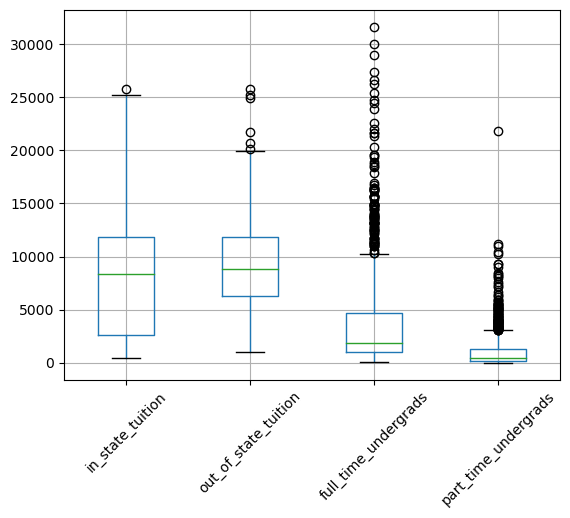

In [108]:
df.boxplot(column=['in_state_tuition', 'out_of_state_tuition', 'full_time_undergrads', 'part_time_undergrads'])
plt.xticks(rotation=45)
plt.show()

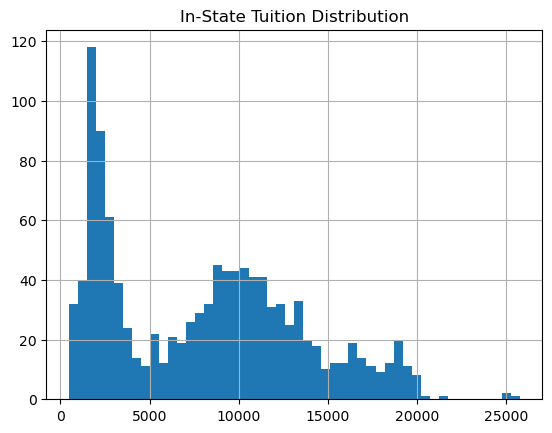

In [109]:
df['in_state_tuition'].hist(bins=50)
plt.title('In-State Tuition Distribution')
plt.show()

In [110]:
# Example: Checking if in-state tuition is ever higher than out-of-state tuition
inconsistent_tuition = df[df['in_state_tuition'] > df['out_of_state_tuition']]
print(f"Number of records where in-state tuition is higher than out-of-state tuition: {len(inconsistent_tuition)}")

# Example: Checking if accepted applications exceed received applications
inconsistent_applications = df[df['applications_received'] < df['applications_accepted']]
print(f"Number of records where accepted applications exceed received applications: {len(inconsistent_applications)}")

Number of records where in-state tuition is higher than out-of-state tuition: 2
Number of records where accepted applications exceed received applications: 0


### Handling Null Values

In [ ]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

### Correcting Data Types

In [67]:
# Correcting Data Types
data_types = {
    'Public (1)/ Private (2)': 'object',
    '# appli. rec\'d': 'int64',
    '# appl. accepted': 'int64',
    '# new stud. enrolled' : 'int64',
    '# FT undergrad' : 'int64',
    '# PT undergrad' : 'int64', 
}

# Apply the data type changes to your DataFrame
df = df.astype(data_types)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [15]:
# Example: Filling missing values for 'in-state tuition' with the median
df['in-state tuition'].fillna(df['in-state tuition'].median(), inplace=True)

# Alternatively, you might decide to drop rows with missing values in critical columns
# df.dropna(subset=['critical_column'], inplace=True)


## Results

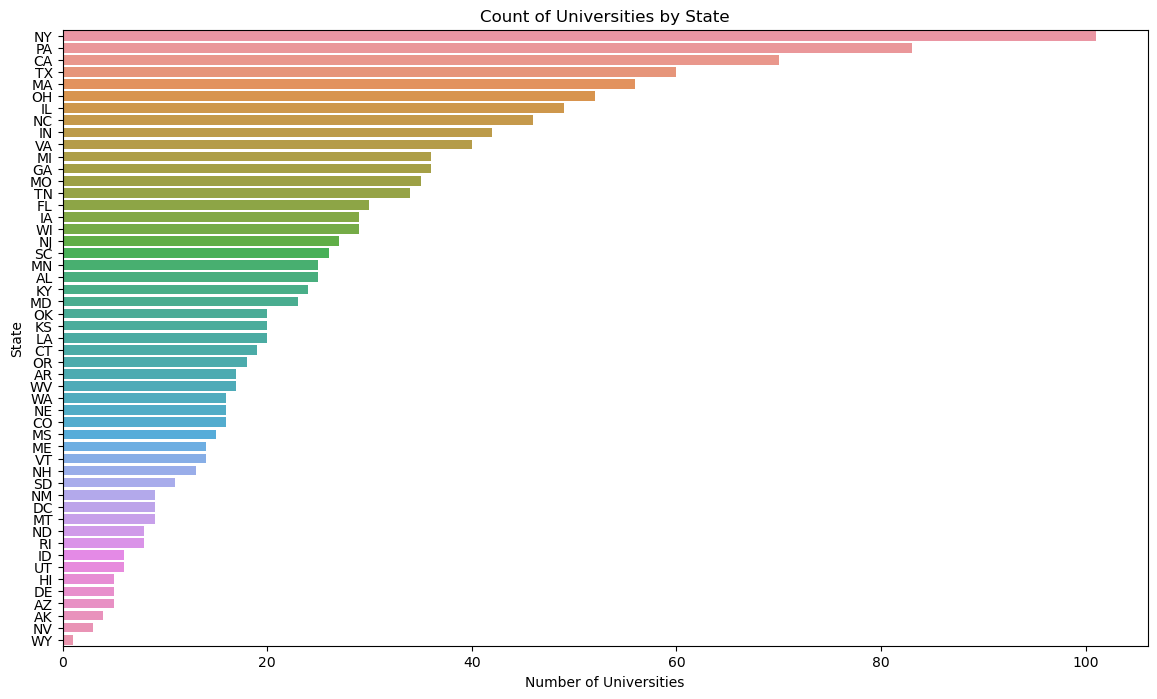

In [ ]:
# Visualization: Distribution of Universities by State
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.countplot(y='State', data=df, order = df['State'].value_counts().index)
plt.title('Count of Universities by State')
plt.xlabel('Number of Universities')
plt.ylabel('State')
plt.show()

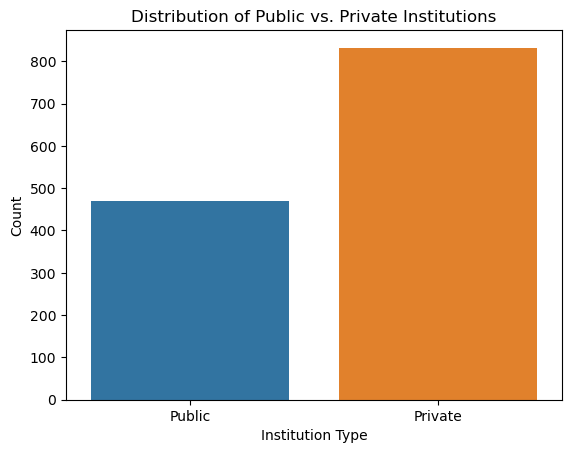

In [ ]:
# Visualization: Distribution of public vs. private institutions
sns.countplot(x='Public (1)/ Private (2)', data=df)
plt.title('Distribution of Public vs. Private Institutions')
plt.xlabel('Institution Type')
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])
plt.ylabel('Count')
plt.show()

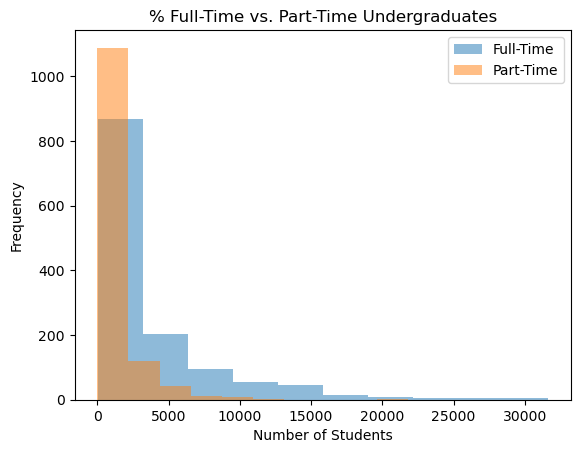

In [ ]:
# Visualization: Distribution of Applications Recieved vs Accepted
plt.hist(df['# FT undergrad'], alpha=0.5, label='Full-Time')
plt.hist(df['# PT undergrad'], alpha=0.5, label='Part-Time')
plt.title('% Full-Time vs. Part-Time Undergraduates')
plt.xlabel('Number of Students')
plt.ylabel('Frequency')
plt.legend()
plt.show()


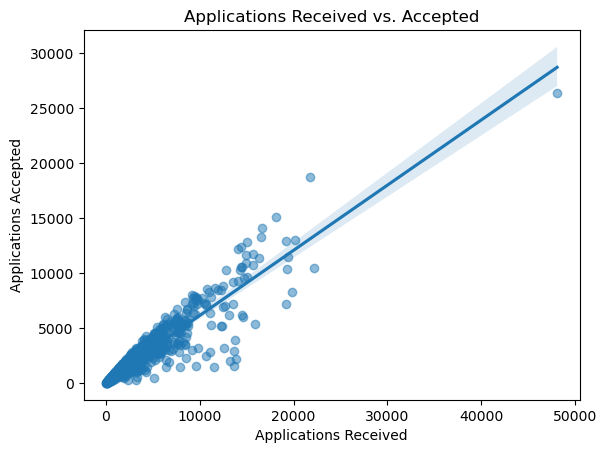

In [ ]:
# Visualization: Distribution of Applications Recieved vs Accepted
sns.regplot(x='# appli. rec\'d', y='# appl. accepted', data=df, scatter_kws={'alpha':0.5})
plt.title('Applications Received vs. Accepted')
plt.xlabel('Applications Received')
plt.ylabel('Applications Accepted')
plt.show()

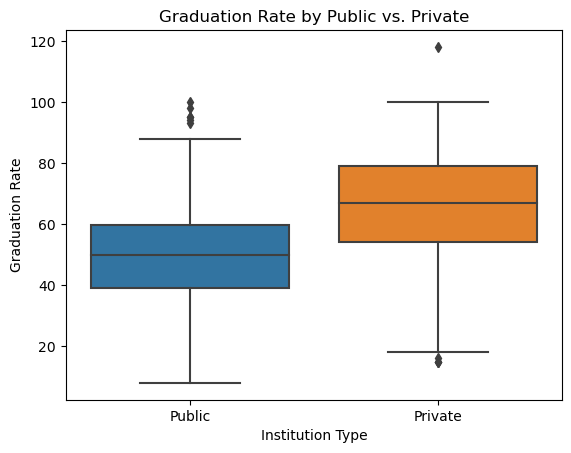

In [ ]:
sns.boxplot(x='Public (1)/ Private (2)', y='Graduation rate', data=df)
plt.title('Graduation Rate by Public vs. Private')
plt.xlabel('Institution Type')
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])
plt.ylabel('Graduation Rate')
plt.show()

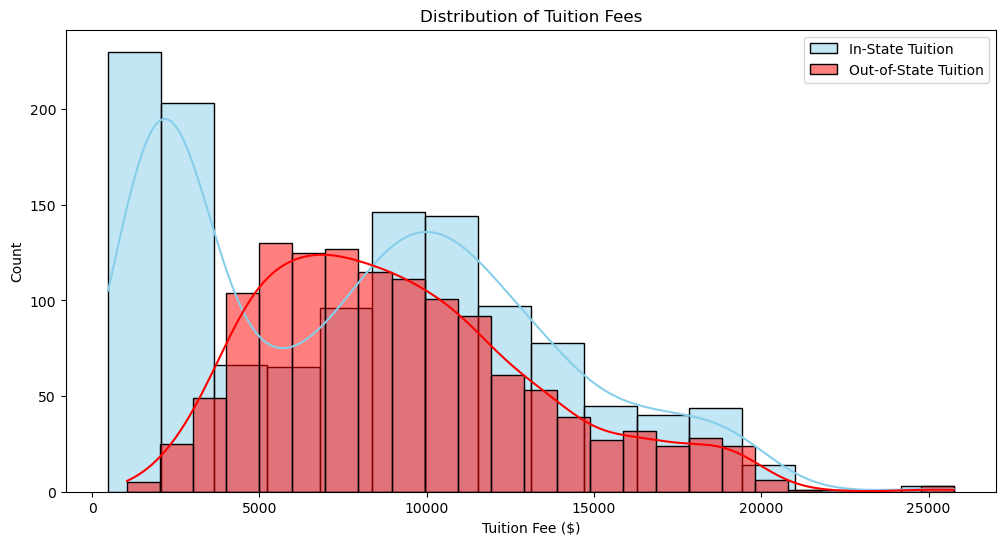

In [ ]:
# Visualization: Distribution of Tuition Fees
plt.figure(figsize=(12, 6))
sns.histplot(df['in-state tuition'], kde=True, color='skyblue', label='In-State Tuition')
sns.histplot(df['out-of-state tuition'], kde=True, color='red', label='Out-of-State Tuition')
plt.title('Distribution of Tuition Fees')
plt.xlabel('Tuition Fee ($)')
plt.ylabel('Count')
plt.legend()
plt.show()

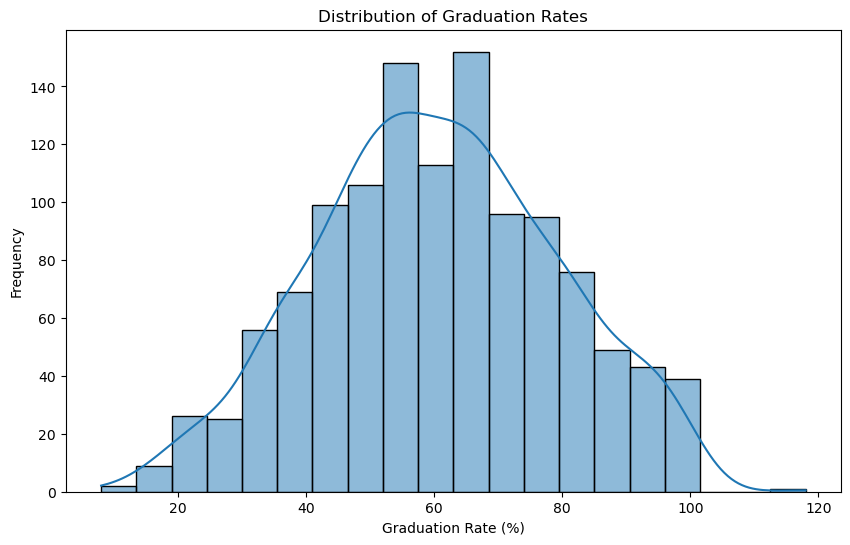

In [ ]:
# Visualization: Distribution of Graduation Rates
plt.figure(figsize=(10, 6))
sns.histplot(df['Graduation rate'], bins=20, kde=True)
plt.title('Distribution of Graduation Rates')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Frequency')
plt.show()

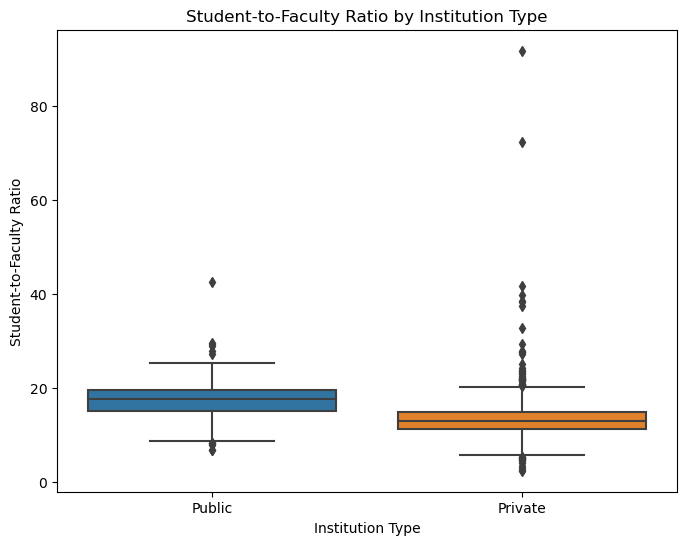

In [ ]:
# Visualization: Student-to-Faculty Ratio by Institution Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Public (1)/ Private (2)', y='stud./fac. ratio', data=df)
plt.title('Student-to-Faculty Ratio by Institution Type')
plt.xlabel('Institution Type')
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])
plt.ylabel('Student-to-Faculty Ratio')
plt.show()

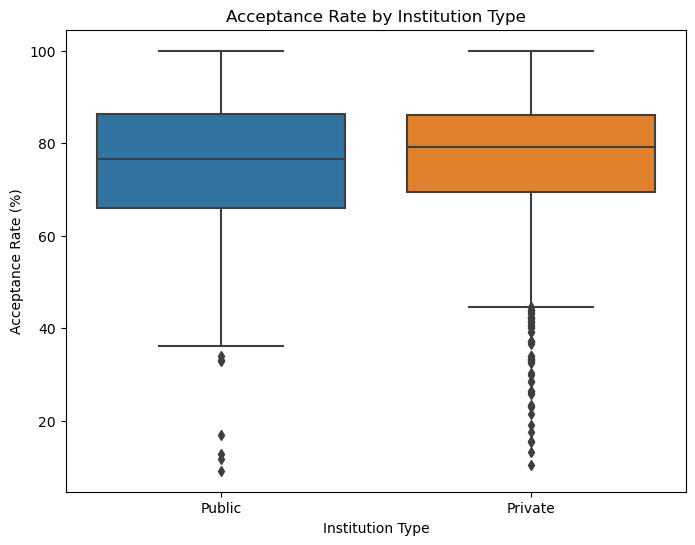

In [ ]:
plt.figure(figsize=(8, 6))
df['acceptance_rate'] = (df['# appl. accepted'] / df['# appli. rec\'d']) * 100
sns.boxplot(x='Public (1)/ Private (2)', y='acceptance_rate', data=df)
plt.title('Acceptance Rate by Institution Type')
plt.xlabel('Institution Type')
plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])
plt.ylabel('Acceptance Rate (%)')
plt.show()

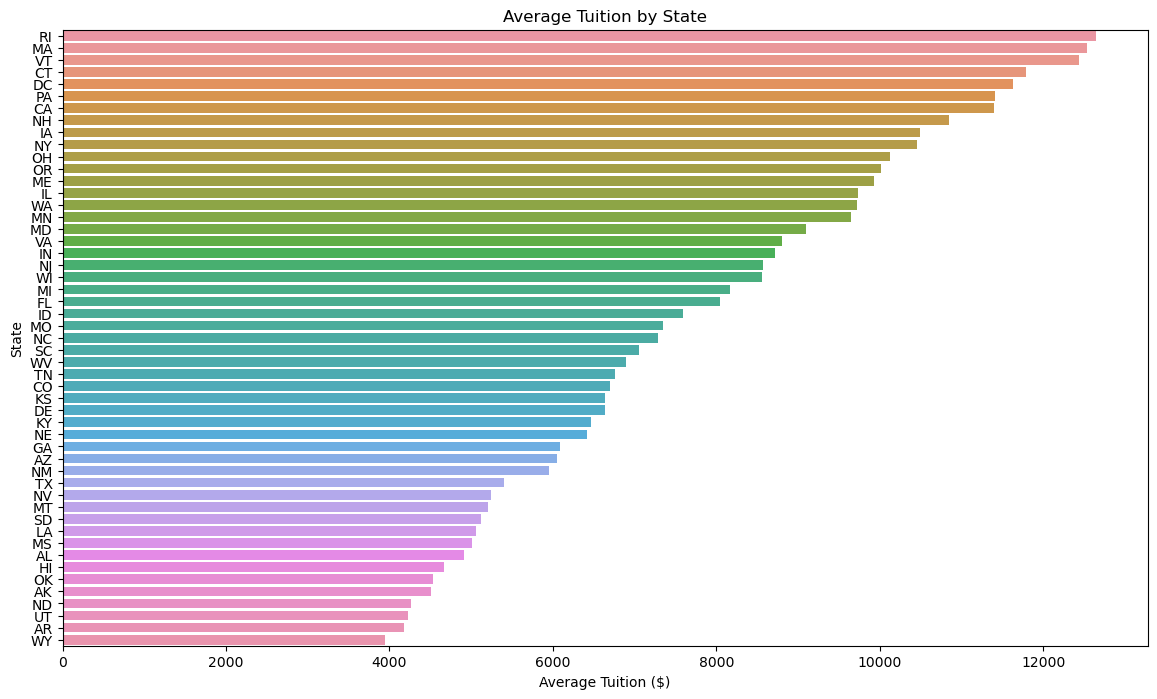

In [ ]:
plt.figure(figsize=(14, 8))
df['average_tuition'] = (df['in-state tuition'] + df['out-of-state tuition']) / 2
state_tuition = df.groupby('State')['average_tuition'].mean().sort_values(ascending=False)
sns.barplot(x=state_tuition.values, y=state_tuition.index)
plt.title('Average Tuition by State')
plt.xlabel('Average Tuition ($)')
plt.ylabel('State')
plt.show()

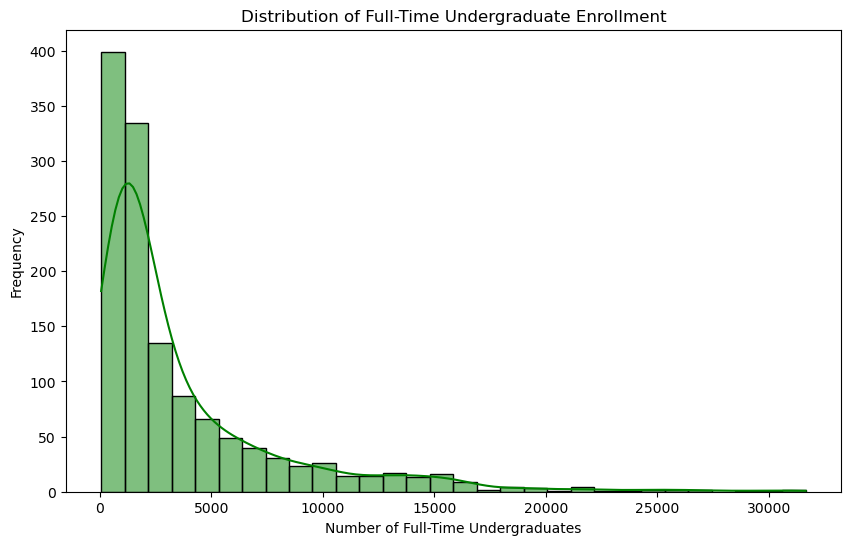

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['# FT undergrad'], bins=30, color='green', kde=True)
plt.title('Distribution of Full-Time Undergraduate Enrollment')
plt.xlabel('Number of Full-Time Undergraduates')
plt.ylabel('Frequency')
plt.show()

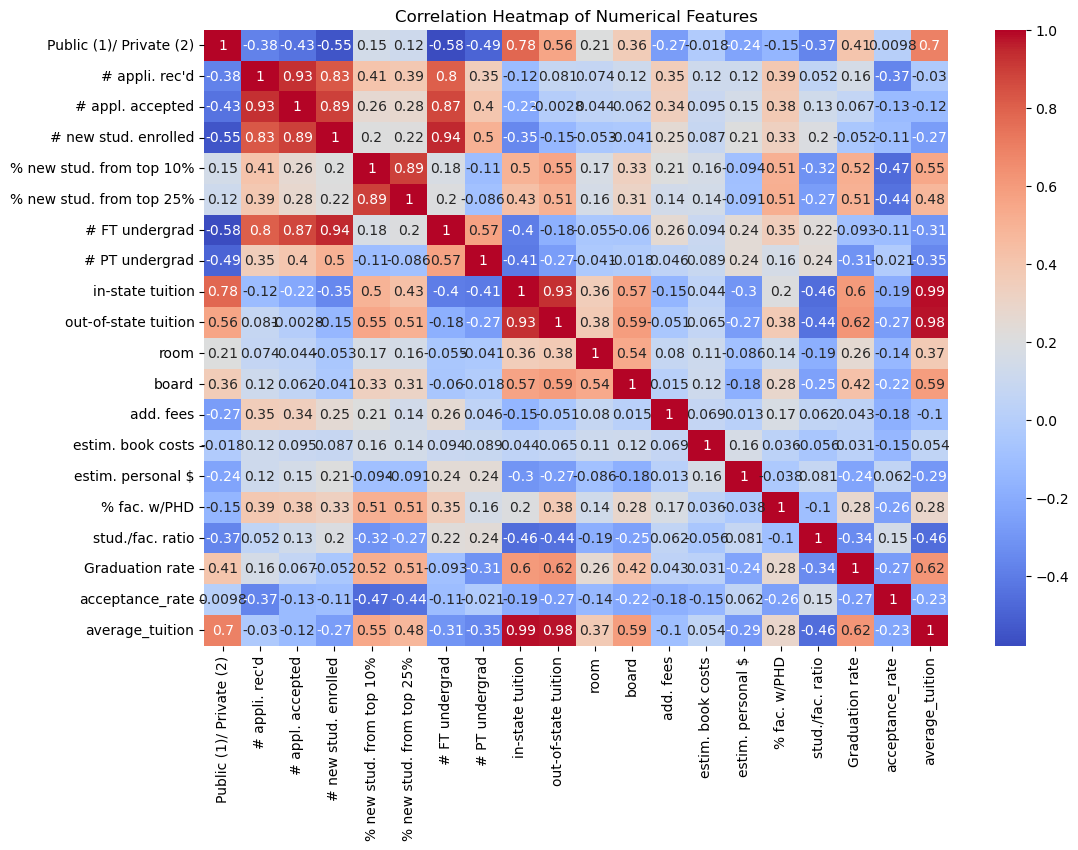

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

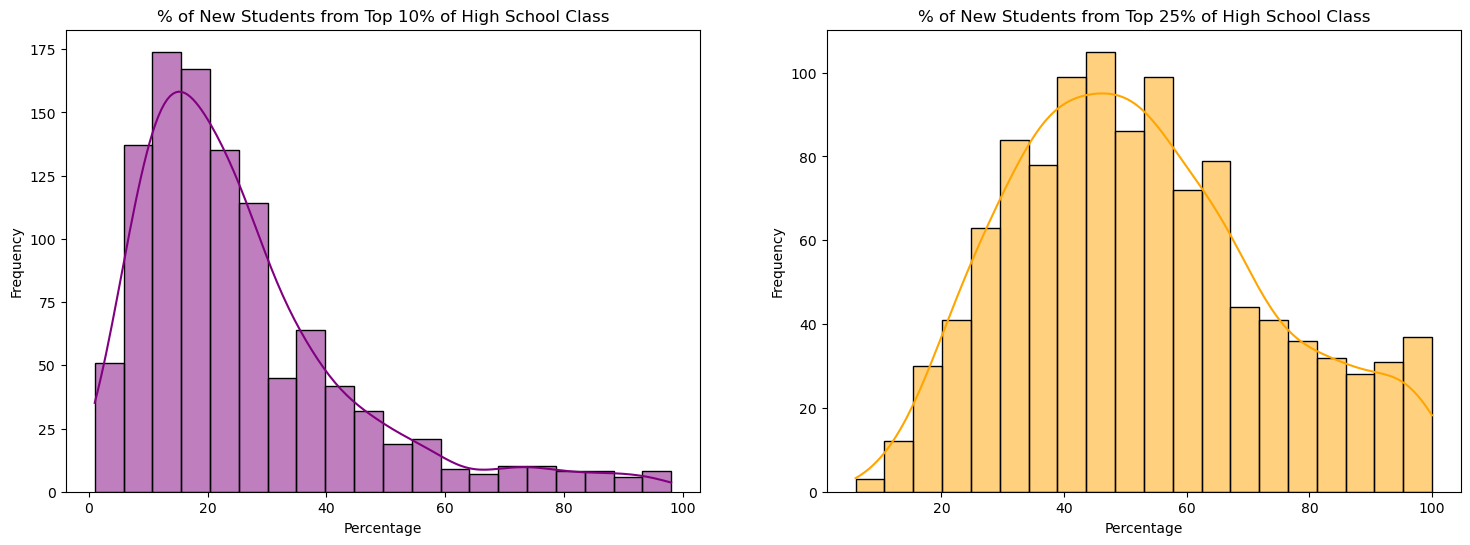

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(df['% new stud. from top 10%'], bins=20, ax=ax[0], color='purple', kde=True)
ax[0].set_title('% of New Students from Top 10% of High School Class')
ax[0].set_xlabel('Percentage')
ax[0].set_ylabel('Frequency')

sns.histplot(df['% new stud. from top 25%'], bins=20, ax=ax[1], color='orange', kde=True)
ax[1].set_title('% of New Students from Top 25% of High School Class')
ax[1].set_xlabel('Percentage')
ax[1].set_ylabel('Frequency')
plt.show()

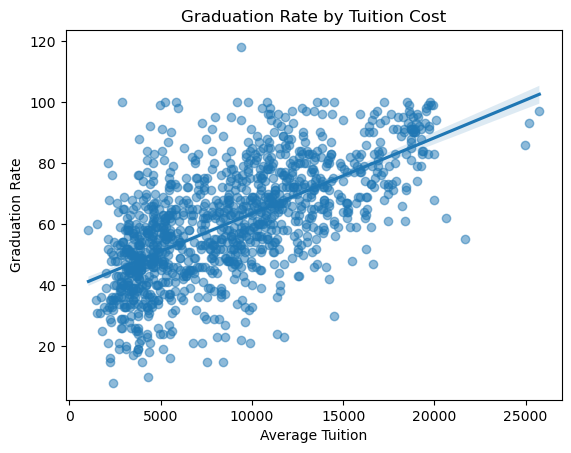

In [ ]:
sns.regplot(x='average_tuition', y='Graduation rate', data=df, scatter_kws={'alpha':0.5})
plt.title('Graduation Rate by Tuition Cost')
plt.xlabel('Average Tuition')
plt.ylabel('Graduation Rate')
plt.show()

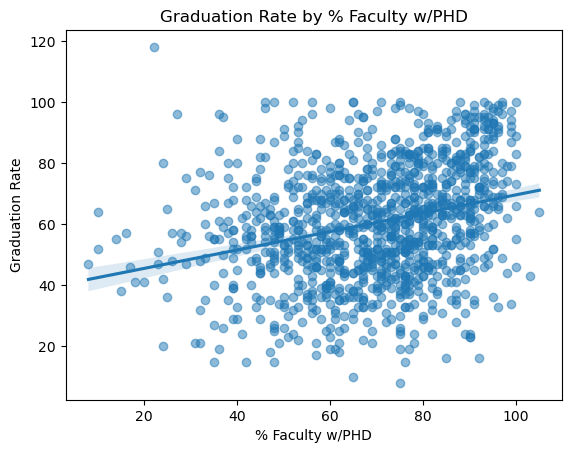

In [ ]:
sns.regplot(x='% fac. w/PHD', y='Graduation rate', data=df, scatter_kws={'alpha':0.5})
plt.title('Graduation Rate by % Faculty w/PHD')
plt.xlabel('% Faculty w/PHD')
plt.ylabel('Graduation Rate')
plt.show()

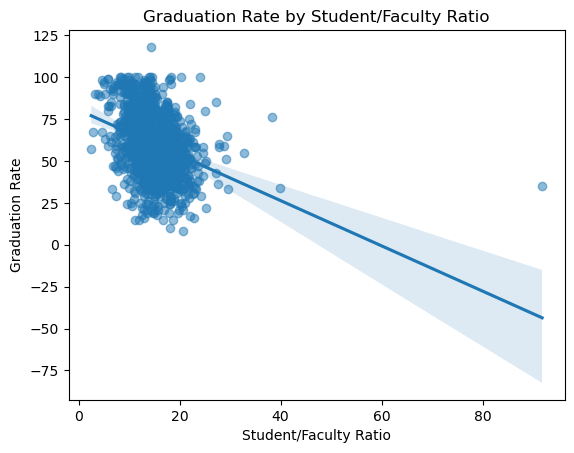

In [ ]:
sns.regplot(x='stud./fac. ratio', y='Graduation rate', data=df, scatter_kws={'alpha':0.5})
plt.title('Graduation Rate by Student/Faculty Ratio')
plt.xlabel('Student/Faculty Ratio')
plt.ylabel('Graduation Rate')
plt.show()


## Recommendations

## Conclusion:

In conclusion, this project outlines the business problem of enhancing Spotify's recommendation system with context-specific music recommendations based on a user's mood. By integrating an automated mood detection algorithm, users will be able to effortlessly generate playlists that align with their emotional state at any given time. This project aims to provide a fully-working prototype, demonstrating the feasibility and value of such an enhancement. By addressing this business problem, Spotify can elevate its recommendation system to new heights and offer users a truly personalized music streaming experience.